In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!/usr/bin/env python3
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn import metrics, preprocessing
import numpy as np
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



def find_class_weights(y_labels):
  class_weights = class_weight.compute_class_weight(
                                          class_weight = "balanced",
                                          classes = np.unique(y_labels),
                                          y = y_labels
                                      )
  label2id = {k:i for i, k in enumerate(sorted(set(y_labels)))}
  # class_weights = dict(zip(list(label2id.values()), class_weights))
  class_weights = dict(zip(np.unique(y_labels), class_weights))
  # print(class_weights)
  return class_weights


def load_csv(filename):
  df = pd.read_csv(filename, header=None)

  df = df.sample(frac=1).reset_index(drop=True)
  labels=df.iloc[:,-1]

  return df, labels

def remove_classes(dataframe, lbl):
    # find removable classes if they have less than 10 instances
    removables = [label for label, count in Counter(lbl).items() if count <= 10]
    # print(removables)
    dataframe = dataframe[~dataframe[dataframe.columns[-1]].isin(removables)]

    # dataframe = dataframe.loc[0:1000] # uncomment for test
    features=dataframe.iloc[:,0:-2]
    labels=dataframe.iloc[:,-1]
    return features, labels





def classify_linearSVC(X_train, X_test, y_train, y_test, class_weight, vec_type ="i-vector", dataname = "archimob"):
  class_names = set(y_train)
  lsvc = LinearSVC(C=0.01, class_weight=class_weight)
  classifier = lsvc.fit(X_train, y_train)
  score = lsvc.score(X_train, y_train)
  print("Score: ", score)
  y_pred = lsvc.predict(X_test)
  print(vec_type+" accuracy:",accuracy_score(y_test, y_pred))
  print(vec_type+" F1:", f1_score(y_test, y_pred, average='macro'))
  print(f"Report: vector type ", vec_type )
  print(classification_report(y_test, y_pred))



  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  titles_options = [
      (dataname + ": " +vec_type+" confmatrix, non_normalized   ", None),
      (dataname + ": " +vec_type+" confmatrix, normalized       ", "true"),
  ]
  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          classifier,
          X_test,
          y_test,
          display_labels=class_names,
          cmap=plt.cm.Reds,
          normalize=normalize,
      )
      disp.ax_.set_title(title)

      print(title)
      print(disp.confusion_matrix)
      plt.savefig(title+'.png', dpi=800)

  plt.show()






training size: 90645
testing size: 22662
class weights {'ab': 9.1661279896574, 'ar': 13.98422090729783, 'as': 272.6923076923077, 'ast': 545.3846153846154, 'az': 272.6923076923077, 'ba': 5.37324744221296, 'bas': 272.6923076923077, 'be': 0.24966107364825607, 'bg': 181.7948717948718, 'bn': 0.2505787343830073, 'br': 49.58041958041958, 'ca': 0.05295767494145899, 'ckb': 3.909567135373587, 'cnh': 34.08653846153846, 'cs': 21.38763197586727, 'cv': 90.8974358974359, 'cy': 7.223637289862455, 'da': 83.90532544378698, 'de': 0.10905511205451217, 'dv': 31.164835164835164, 'el': 24.23931623931624, 'en': 0.027027336111036988, 'eo': 3.089997820876008, 'es': 0.1434656360343589, 'et': 2.811260904044409, 'eu': 4.721944721944722, 'fa': 1.0569469290399522, 'fi': 68.17307692307692, 'fr': 0.11022324482308314, 'fy-NL': 3.685031185031185, 'ga-IE': 29.48024948024948, 'gl': 43.63076923076923, 'gn': 218.15384615384616, 'ha': 545.3846153846154, 'hi': 90.8974358974359, 'hsb': 545.3846153846154, 'hu': 68.1730769230769

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ab       0.05      0.43      0.09        23
          ar       0.05      0.42      0.09        19
          ba       0.06      0.29      0.11        35
          be       0.59      0.53      0.56       890
          bn       0.55      0.58      0.56       891
          br       0.03      0.67      0.06         3
          ca       0.80      0.49      0.60      4162
         ckb       0.15      0.56      0.24        50
         cnh       0.03      1.00      0.06         2
          cs       0.05      0.64      0.09        11
          cv       0.05      1.00      0.09         1
          cy       0.06      0.54      0.11        28
          da       0.10      0.50      0.16         4
          de       0.67      0.43      0.52      2013
          dv       0.04      0.86      0.08         7
          el       0.02      0.75      0.04         4
          en       0.83      0.37      0.51      8004
          eo       0.17    

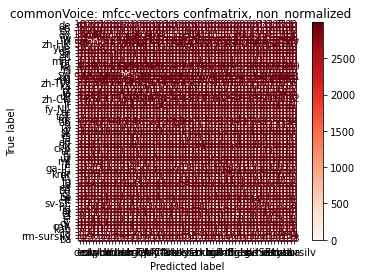

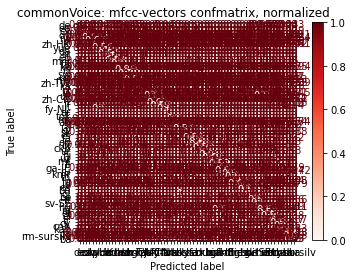

In [3]:
## mfcc vector

df, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/commonvoice/commonvoice_mfcc_vectors.csv")
features, labels = remove_classes(df, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True)
print("training size:", len(X_train))
print("testing size:", len(X_test))
class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="mfcc-vectors", dataname = "commonVoice")


training size: 90643
testing size: 22661
class weights {'ab': 9.078671468587435, 'ar': 13.850793650793651, 'as': 270.0904761904762, 'ast': 540.1809523809524, 'az': 270.0904761904762, 'ba': 5.321979826413324, 'bas': 270.0904761904762, 'be': 0.2472789894167784, 'bg': 180.06031746031746, 'bn': 0.24818789450078216, 'br': 49.10735930735931, 'ca': 0.0524523913561152, 'ckb': 3.8722648916197304, 'cnh': 33.76130952380952, 'cs': 21.183566760037348, 'cv': 90.03015873015873, 'cy': 7.154714601072217, 'da': 83.1047619047619, 'de': 0.10801458755867874, 'dv': 30.867482993197278, 'el': 24.00804232804233, 'en': 0.026770124260026878, 'eo': 3.0605153109402403, 'es': 0.14209679136681636, 'et': 2.7844378988708884, 'eu': 4.676891362605648, 'fa': 1.0468623108157993, 'fi': 67.52261904761905, 'fr': 0.10917157485467914, 'fy-NL': 3.6498712998713, 'ga-IE': 29.1989703989704, 'gl': 43.21447619047619, 'gn': 216.07238095238094, 'ha': 540.1809523809524, 'hi': 90.03015873015873, 'hsb': 540.1809523809524, 'hu': 67.522619

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ab       0.02      0.36      0.04        22
          ar       0.01      0.13      0.01        15
          ba       0.02      0.10      0.03        51
          be       0.37      0.15      0.21       886
          bn       0.40      0.35      0.37       854
          br       0.00      0.00      0.00         5
          ca       0.72      0.29      0.41      4143
         ckb       0.04      0.30      0.08        60
         cnh       0.05      0.20      0.08        10
          cs       0.00      0.00      0.00         6
          cv       0.00      0.00      0.00         1
          cy       0.00      0.07      0.01        28
          da       0.00      0.00      0.00         0
          de       0.55      0.23      0.32      2011
          dv       0.00      0.00      0.00         7
          el       0.00      0.00      0.00        11
          en       0.84      0.44      0.57      8033
          eo       0.04    

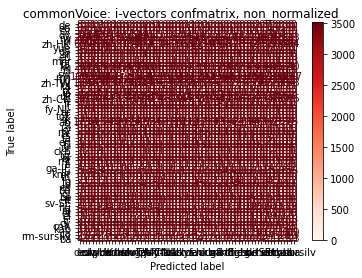

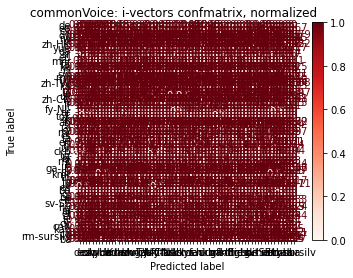

In [5]:
## i vector

df, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/commonvoice/cv_ivectors.csv")
features, labels = remove_classes(df, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True)
print("training size:", len(X_train))
print("testing size:", len(X_test))
class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="i-vectors", dataname = "commonVoice")


training size: 90643
testing size: 22661
class weights {'ab': 9.078671468587435, 'ar': 13.850793650793651, 'as': 270.0904761904762, 'ast': 540.1809523809524, 'az': 270.0904761904762, 'ba': 5.321979826413324, 'bas': 270.0904761904762, 'be': 0.2472789894167784, 'bg': 180.06031746031746, 'bn': 0.24818789450078216, 'br': 49.10735930735931, 'ca': 0.0524523913561152, 'ckb': 3.8722648916197304, 'cnh': 33.76130952380952, 'cs': 21.183566760037348, 'cv': 90.03015873015873, 'cy': 7.154714601072217, 'da': 83.1047619047619, 'de': 0.10801458755867874, 'dv': 30.867482993197278, 'el': 24.00804232804233, 'en': 0.026770124260026878, 'eo': 3.0605153109402403, 'es': 0.14209679136681636, 'et': 2.7844378988708884, 'eu': 4.676891362605648, 'fa': 1.0468623108157993, 'fi': 67.52261904761905, 'fr': 0.10917157485467914, 'fy-NL': 3.6498712998713, 'ga-IE': 29.1989703989704, 'gl': 43.21447619047619, 'gn': 216.07238095238094, 'ha': 540.1809523809524, 'hi': 90.03015873015873, 'hsb': 540.1809523809524, 'hu': 67.522619

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score:  0.7345520338029412
x-vectors accuracy: 0.6849212303075769
x-vectors F1: 0.2100547191443554
Report: vector type  x-vectors
              precision    recall  f1-score   support

          ab       0.07      0.36      0.12        14
          ar       0.02      0.18      0.04        11
          ba       0.12      0.35      0.18        43
          be       0.71      0.60      0.65       858
          bn       0.72      0.80      0.76       839
          br       0.00      0.00      0.00         2
          ca       0.88      0.73      0.80      4211
         ckb       0.12      0.36      0.17        59
         cnh       0.00      0.00      0.00         5
          cs       0.00      0.00      0.00        13
          cv       0.00      0.00      0.00         2
          cy       0.10      0.61      0.17        28
          da       0.00      0.00      0.00         3
          de       0.80      0.68      0.73      1966
          dv       0.00      0.00      0.00         8
     

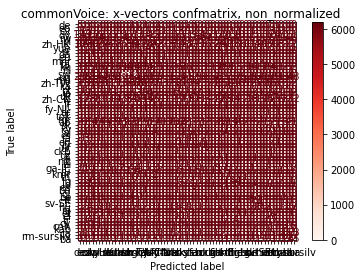

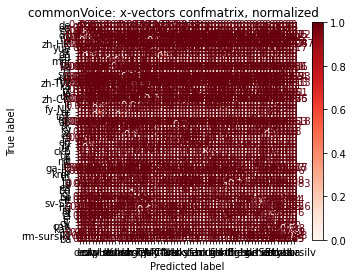

In [7]:
## x vector
df, tr_labels = load_csv("/content/drive/MyDrive/archimob_data/final_data/commonvoice/cv_xvectors.csv")
features, labels = remove_classes(df, tr_labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42,shuffle=True)
print("training size:", len(X_train))
print("testing size:", len(X_test))
class_weights= find_class_weights(tr_labels)
print("class weights", class_weights)

classify_linearSVC(X_train, X_test, y_train, y_test, class_weights, vec_type ="x-vectors", dataname = "commonVoice")



In [ ]:


# # # Gridsearch to determine the value of C
# param_grid = {'C':np.arange(1, 100, 10)}
# linearSVC = GridSearchCV(LinearSVC(),param_grid,cv=5,return_train_score=True)
# linearSVC.fit(X_train,y_train)
# print(linearSVC.best_params_)

# bestlinearSVC = linearSVC.best_estimator_
# bestlinearSVC.fit(X_train,y_train)
# bestlinearSVC.score(X_train,y_train)
# y_pred = bestlinearSVC.predict(X_test)
# print("Accuracy on Linear SVC :",accuracy_score(y_test, y_pred))
# print(f"Report Classifier: vectors/SVC Linear ")
# print(classification_report(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# print("F1:", f1_score(y_test, y_pred, average='macro'))

# cf_matrix = confusion_matrix(y_test, y_pred)
# svm_plot = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
#             fmt='.2%', cmap='Blues')
# figure = svm_plot.get_figure()
# figure.savefig('isvm_conf_percentage.png', dpi=400)

# svm_plot = sns.heatmap(cf_matrix, annot=True,
#             fmt='.2%', cmap='Blues')
# figure = svm_plot.get_figure()
# figure.savefig('isvm_conf.png', dpi=400)
